# Decision Trees and Random Forests

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv('kyphosis.csv')
# kyphosis, kambur olma hastaligi

In [44]:
df.head()
# cocuklar uzerinde yapilan bir veri, age: ay bazinda
# number: ameliyatlara ait veri, kac omurgada problem var
# start: kacinci omurgadan itibaren mudahale edilecek
# kyphosis: hastalik var veya yok

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [46]:
df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

## EDA

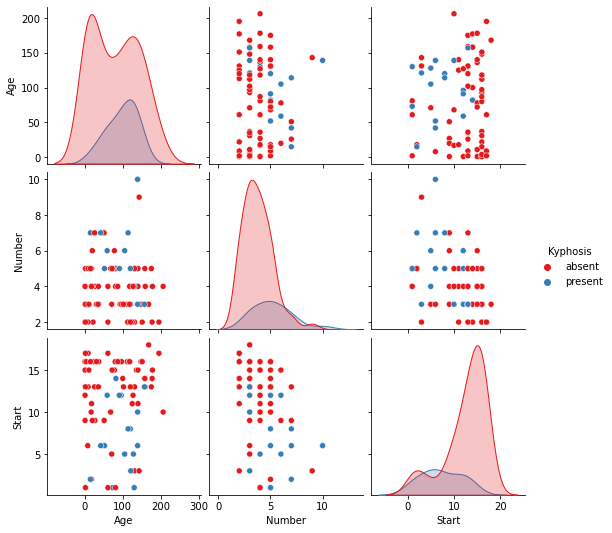

In [47]:
sns.pairplot(df,hue='Kyphosis',palette='Set1');

## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

## 1-Decision Trees Model

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [53]:
y_pred = model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(confusion_matrix(y_test,y_pred))

[[12  5]
 [ 6  2]]


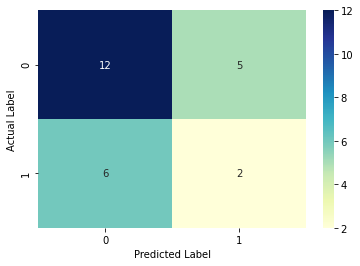

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

In [57]:
# R2 score
print(model.score(X,y)*100)

86.41975308641975


> Veri unbalanced ve yetersiz. accuracy e ve R2 ye bakilmaz. Recall ve F1 e bakilir

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



## Tree Visualization

In [59]:
from sklearn import tree

In [60]:
df.head(2)

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14

In [61]:
features = list(df.columns[1:])
targets=y.unique()
print(f'features: {features}',
      f'targets: {targets}',sep="\n")

features: ['Age', 'Number', 'Start']
targets: ['absent' 'present']


In [62]:
y.value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

* Verinin unbalanced oldugu yukarida goruluyor

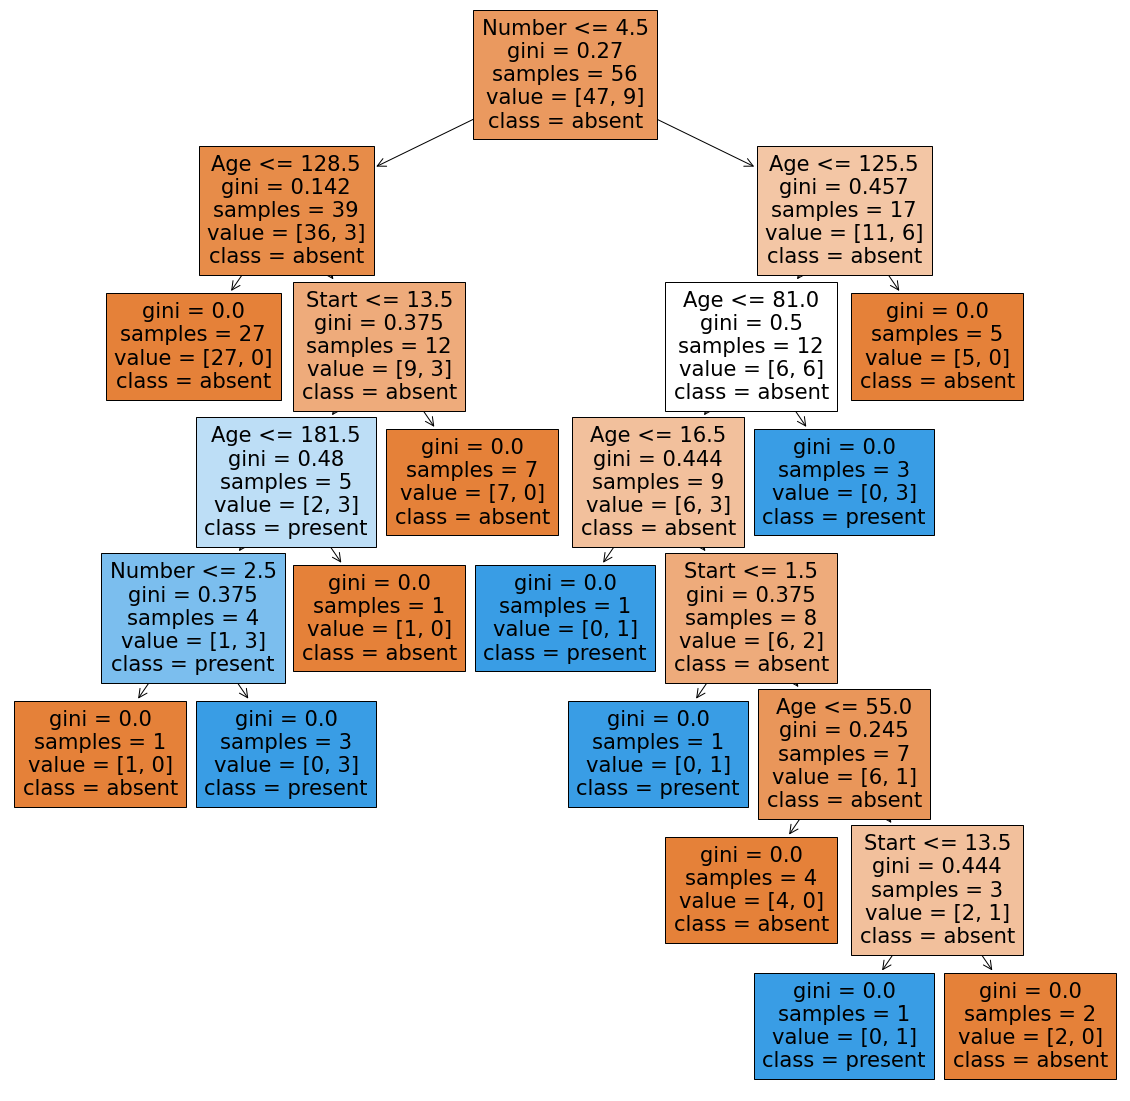

In [63]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(model,filled=True,feature_names=features ,class_names = targets)

* Gini Index, 0 (%0) ile 1 (%100) aralığındadır; 0, mükemmel eşitliği temsil eder ve 1, mükemmel eşitsizliği temsil eder. 
* Gini indeksi, rastgele seçilen bir öğenin ne sıklıkta yanlış tespit edildiğini ölçmek için kullanılan bir metriktir. 
* Düşük gini indeksi olan bir özellik tercih edilmelidir. Gini indeksi kategorik hedef değişkeni için başarılı veya başarısız olarak çalışır. 
* Gini indeks, yalnızca ikili bölmeleri (binary: 1 veya 0) gerçekleştirir ve yüksek gini indeksi homojenliği artırır. 

## 2-Random Forests

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
y_pred = model.predict(X_test)

In [66]:
print(confusion_matrix(y_test,y_pred))

[[17  0]
 [ 7  1]]


In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.71      1.00      0.83        17
     present       1.00      0.12      0.22         8

    accuracy                           0.72        25
   macro avg       0.85      0.56      0.53        25
weighted avg       0.80      0.72      0.64        25



## Tree Visualization

In [68]:
fn=features
cn=targets
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
tree.plot_tree(model.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf.png')